### Librerías

In [1]:
#Análisis
import numpy as np
import pandas as pd
#Visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Obtención de la data

In [85]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df] 

### Análisis de la data

In [86]:
print(train_df.columns.values) #mostrar todos los features que están en la data

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [87]:
train_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
train_df.info()  #Revisar la información tanto del df de test como el de entrenamiento
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [89]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
train_df.describe(include=['O']) #Ver cuántos valores únicos hay en cada columna (Object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wheadon, Mr. Edward H",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [91]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [92]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [93]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [94]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Visualización de la data

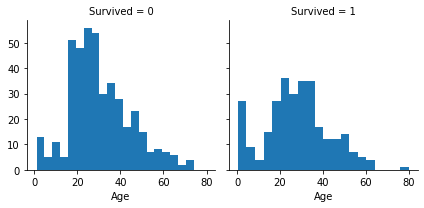

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


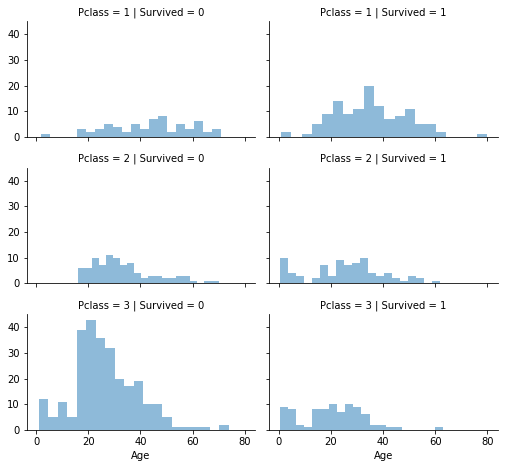

In [13]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


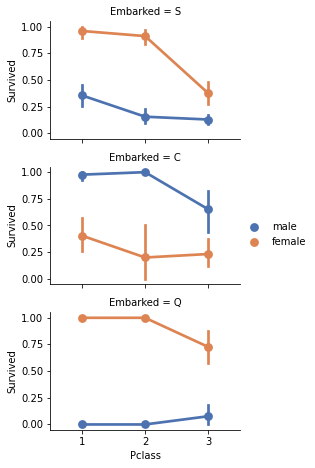

In [14]:
g = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

### Limpieza de la data

In [95]:
#Eliminar la columna de Cabin y de Ticket
train_df.drop(['Ticket', 'Cabin'], inplace = True, axis=1)
test_df.drop(['Ticket', 'Cabin'], inplace=True, axis=1)
combine = [train_df, test_df]

In [96]:

#Creando nuevos features
for dataset in combine: # Recorrer los dos dataset (Test y Pruebas) y extraer el Título del nombre EG. "Braund, Mr. Owen" Resultado "Mr."
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

pd.crosstab(train_df['Title'], train_df['Sex']) 

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [97]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
                                               'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [98]:
# Transformar de categoría a numérico los títulos
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping) # Remplazar los títulos por las nuevas categorias numéricas
  dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [99]:
#Eliminar la columna de nombre (Train y Test) y la columna de PassengerID (Train)
train_df.drop(['Name', 'PassengerId'], inplace=True, axis=1) 
test_df.drop(['Name'], inplace=True, axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [100]:
# Convertir la categoría Sex a numérica
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
combine = [train_df, test_df]
train_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [101]:
#Completar los valores faltantes de la columna de edad con la media de las edades
mean_ages = int(dataset['Age'].mean())
for dataset in combine:
  dataset['Age'] = dataset['Age'].fillna(mean_ages).astype(int)
combine = [train_df, test_df]
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [102]:
# Categorizar las edades en 5 rangos
train_df['AgeBand'] = pd.cut(train_df['Age'], 5) 

In [103]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean() 

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [104]:
#Reemplazar las edades por los nuevos rangos
for dataset in combine:
  dataset.loc[ dataset['Age'] <= 16, 'Age' ] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine = [train_df, test_df] 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [105]:
#Eliminar el campo AgeBand
train_df.drop(['AgeBand'], axis=1, inplace=True)
combine = [train_df, test_df]
train_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [106]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [107]:
# Crear un nuevo feature para saber si el pasajero estaba solo
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1 

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [108]:
#Eliminar las columnas Parch, SibSp y FamilySize
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head() 

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [109]:
#Rellenar los valores pérdidos de Embarked con el más común
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [110]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [111]:
#Convertir feature de categoría a numérico la columna Embarked
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 3}).astype(int)

train_df.head() 

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [112]:
#Rellenar el valor que falta en la columna Fare del dataset test con el promedio de los valores
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,3,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,3,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [113]:
#Separar en rangos la columna Fare
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) 
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True) 

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [114]:
for dataset in combine:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91 ) & (dataset['Fare'] <=14.454), 'Fare'] = 1 
  dataset.loc[(dataset['Fare'] > 14.454 ) & (dataset['Fare'] <=31), 'Fare'] = 2 
  dataset.loc[dataset['Fare'] > 31 , 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [116]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,3,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,3,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
5,897,3,0,0,1,0,1,1
6,898,3,1,1,0,3,2,1
7,899,2,0,1,2,0,1,0
8,900,3,1,1,0,1,3,1
9,901,3,0,1,2,0,1,0


### Aplicando algoritmos de predicción

In [118]:
#Separando la data de entrenamiento y test en variables dependientes e idependientes
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy() 

##### Regresión Logística

In [122]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test) 
score = round(logreg.score(X_train, y_train) * 100, 2) 
score 

80.47

##### Support Vector Machine

In [124]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
score = round(svc.score(X_train, y_train) * 100, 2) 
score 

83.39

##### KneighborsClassifier


In [126]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
Y_predict = knn.predict(X_test)
score = round(knn.score(X_train, y_train) * 100, 2) 
score 

85.3

##### Gaussian Naive Bayes

In [127]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_predict = gaussian.predict(X_test)
score = round(gaussian.score(X_train, y_train) * 100, 2) 
score 

77.1

##### Perceptron

In [128]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predict = perceptron.predict(X_test)
score = round(perceptron.score(X_train, y_train) * 100, 2) 
score  

78.56

##### Linear SVC

In [129]:
linear = LinearSVC()
linear.fit(X_train, y_train)
predict = linear.predict(X_test)
score = round(linear.score(X_train, y_train) * 100, 2) 
score  

79.69

##### Stochastic Gradient Descent

In [130]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predict = sgd.predict(X_test)
score = round(sgd.score(X_train, y_train) * 100, 2) 
score  

74.86

##### Decision Tree

In [131]:
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)
predict = cls.predict(X_test)
score = round(cls.score(X_train, y_train) * 100, 2) 
score  

86.87

##### Random Forest

In [133]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
predict = random_forest.predict(X_test)
score = round(random_forest.score(X_train, y_train) * 100, 2) 
score  

86.87